<a href="https://colab.research.google.com/github/ThisariG/ML-Playground/blob/main/Combined%20Cycle%20Power%20Plant%20Data%20Set/HourlyEnergyPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use Case**

Multivariate Linear Regression on [Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant)

The problem that is solved here is predicting the net hourly electrical energy output when the temperature, ambient pressure, relative humidity, exhaust vacuum of a Combined Cycle Power Plant is known.

**Attribute Information**

Features consist of hourly average ambient variables

- Temperature (T) in the range 1.81°C and 37.11°C
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#for splitting data into train and test set
from sklearn.model_selection import train_test_split

#linear regression model
from sklearn.linear_model import LinearRegression

#metrics for evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#standardization 
from sklearn.preprocessing import StandardScaler


# Importing Data

In [2]:
#importing the dataset from GitHub
data = pd.read_csv('https://raw.githubusercontent.com/ThisariG/ML-Playground/main/Combined%20Cycle%20Power%20Plant%20Data%20Set/data.csv')


In [3]:
#checking if the data set is loaded correctly
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.shape

(9568, 5)

## Understanding Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Visualizing Data to Gain Insights

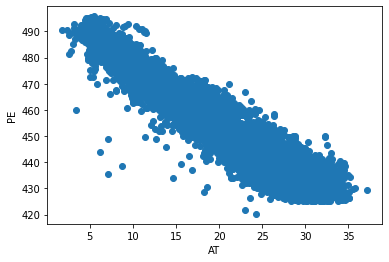

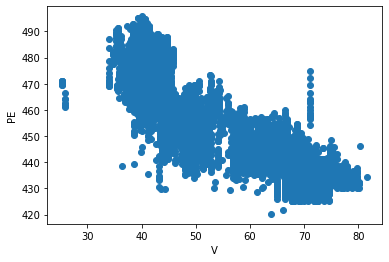

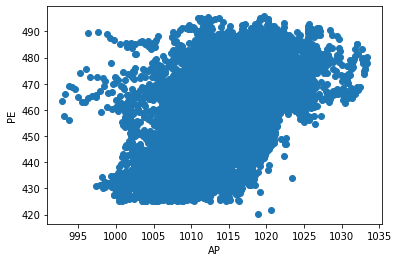

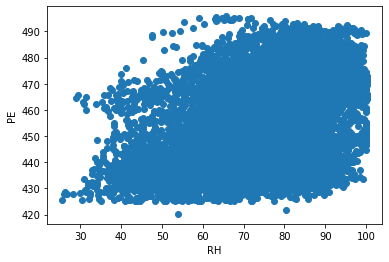

In [12]:
#plotting the independent variables against the dependent varaiable
features = ['AT', 'V', 'AP', 'RH']
for feature in features:
  plt.scatter(data[feature], data['PE'])
  plt.xlabel(feature)
  plt.ylabel('PE')
  plt.show()

# Data Preprocessing

In [13]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Since there are no missing values in the data set, no need to perform any dropping of data points or imputation.

Since there are no categorical data, no need to perform any encoding.


In [7]:
#checking for any duplicates
data.duplicated().sum()


41

In [8]:
#dropping duplicates
data.drop_duplicates( inplace=True)

In [9]:
#defining the independent variables
x = data.drop(['PE'], axis=1).values

#defining the dependent variable
y = data['PE'].values


In [10]:
print(x.shape)
print(y.shape)

(9527, 4)
(9527,)


In [11]:
#splitting test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Selection and Training of the Model









In [14]:
#transforming data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
# Training the model using the training set
linear_reg_model = LinearRegression().fit(x_train, y_train)

In [16]:
# Predicting the test set results
y_pred = linear_reg_model.predict(x_test)

## Evaluating the Model

In [17]:
#using r2 score
r2_score(y_test, y_pred)

0.9283920303369918

In [18]:
#Using Mean Squared Error
mean_squared_error(y_test, y_pred)

21.04514714523833

In [19]:
#Using Root Mean Squared Error
mean_squared_error(y_test, y_pred, squared = False)

4.587499007655297

## Visualization of Results

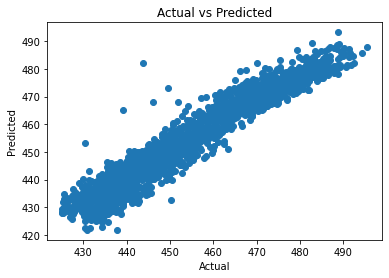

In [20]:
#plotting the actual values vs the predicted results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()